Goal is to compare the HP1 and PRC1 binding profiles under a competitive binding model between:
chromo
mean field chromosomal field theory
self-consisitent binding model theory (which can have rubenstein nuclear looping OR nearest neighboor interactions only)

In [10]:
import numpy as np
# import scipy.special as sp
# import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from matplotlib.colors import LogNorm

# Chromo

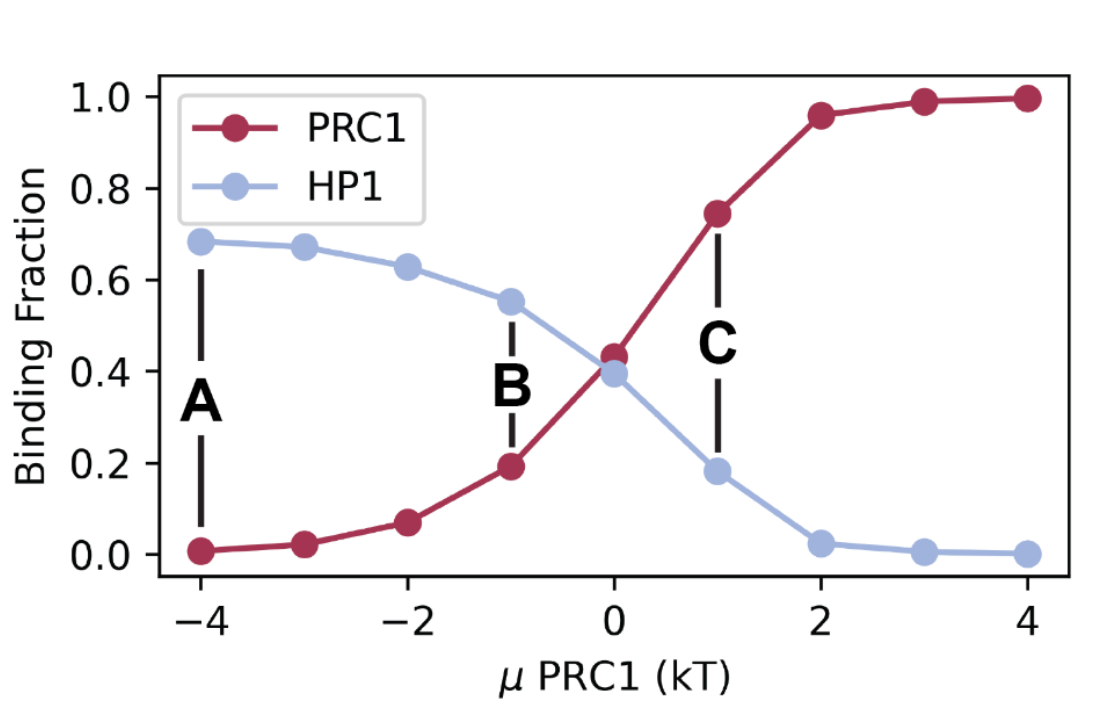

$\mu_{HP1} = -1; \  v_{HP1-HP1} = v_{PRC1-PRC1} = -4; \  v_{HP1_PRC1} = 0$ 

# chromosomal field theory

In [17]:
ID = 4441.64006

looping = "full mark dens comp alt f_bind,"

settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\nuc_prop_b=40_full_marks_competitive_2_alt_f_bind\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

[n_bind, v_int, Vol_int, e_m, rho_c, rho_s, poly_marks, M, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

[marks_1, marks_2] = poly_marks

mu1_array = np.arange(mu_min, mu_max, del_mu)
mu2_array = np.arange(mu_min, mu_max, del_mu)

k_vec = np.logspace(klog_min, klog_max, klog_num) / b
  
# s2_mats = np.load(r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\ID=%s_chrom_s2_mats_v_int=[[%s,%s],[%s,%s]],DNA,mu_max=%s.npy"\
#                  % (ID, v_int[0,0], v_int[0,1], v_int[1,0], v_int[1,1], mu_max), allow_pickle = True)

density_maps = np.load(r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\nuc_prop_b=40_full_marks_competitive_2_alt_f_bind\ID=%s_density_maps.npy" % ID, allow_pickle=True)
spacing = int(1 / del_mu)

print("v_int: ")
print(v_int)

print(r"rho_c: ")
print(rho_c)

print("mu max, min, del_mu:")
print(mu_max, mu_min, del_mu) 

print("k logspace min, max, tot num:")
print(klog_min, klog_max, klog_num)

v_int: 
[[-4  0]
 [ 0 -4]]
rho_c: 
5.7295779513082324e-05
mu max, min, del_mu:
8 -8 0.1
k logspace min, max, tot num:
-2.5 -1 30


(-4.0, 4.0)

<Figure size 640x480 with 0 Axes>

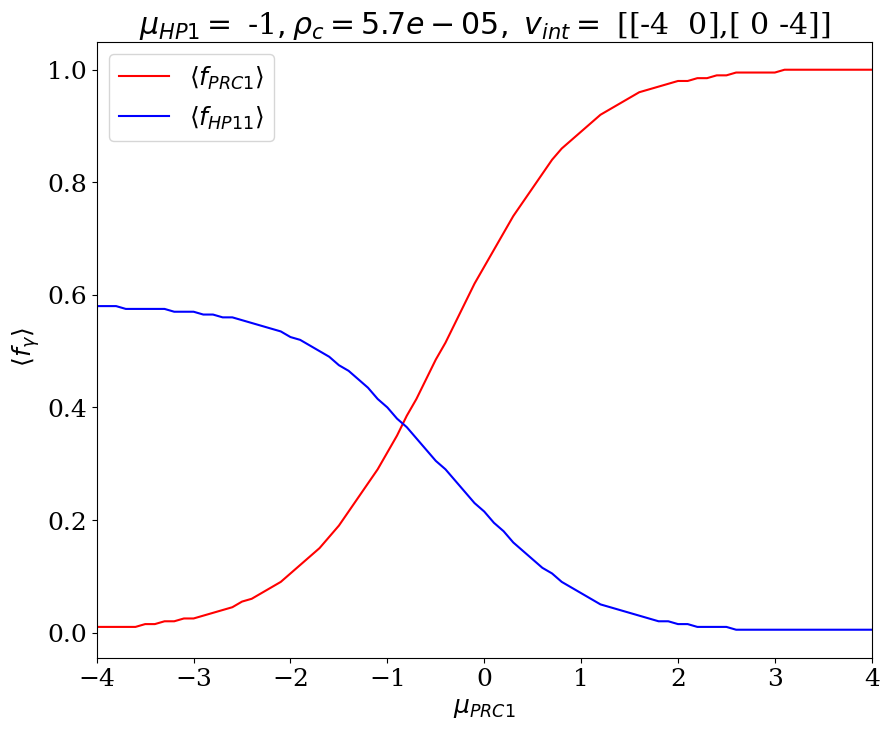

In [19]:
# 1D solution plotting
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

f_gam = density_maps

mu1_val = -1
# # f_bar (single solns ONLY): 
# plt.plot(mu1_array, f_gam_soln_arr[0][:,9], label = r"$ \langle f_{\gamma}^{(1)} \rangle $", color = "blue")
plt.plot(mu2_array, f_gam[1][np.where(np.round(mu1_array,2) == mu1_val )[0][0],:] / 2, label = r"$ \langle f_{PRC1} \rangle $", color = "red", linestyle = "-")
plt.plot(mu1_array, f_gam[0][np.where(np.round(mu1_array,2) == mu1_val )[0][0],:] / 2, label = r"$ \langle f_{HP11} \rangle $", color = "blue", linestyle = "-")


# s_bind:
# plt.plot(mu1_array, s_bind_soln_arr[0][:,0], label = r"$ \langle s_{bind}^{(\gamma_1, \sigma = 0)} \rangle $",)
# plt.plot(mu1_array, s_bind_soln_arr[1][:,0], label = r"$ \langle s_{bind}^{(\gamma_1, \sigma = 1)} \rangle $",)
# plt.plot(mu1_array, s_bind_soln_arr[2][:,0], label = r"$ \langle s_{bind}^{(\gamma_1, \sigma = 2)} \rangle $",)

# plt.plot(mu2_array, s_bind_soln_arr[3][0,:], label = r"$ \langle s_{bind}^{(\gamma_2, \sigma = 0)} \rangle $",)
# plt.plot(mu2_array, s_bind_soln_arr[4][0,:], label = r"$ \langle s_{bind}^{(\gamma_2, \sigma = 1)} \rangle $",)
# plt.plot(mu2_array, s_bind_soln_arr[5][0,:], label = r"$ \langle s_{bind}^{(\gamma_2, \sigma = 2)} \rangle $",)


# LANGMUIR. Assumptions only valid when v_int = 0, and for sigma =0 or 2 (all sites identical)
# K = np.exp(-e_m[0])
# plt.plot(mu1_array, 2*K*np.exp(mu1_array) / (1+ K*np.exp(mu1_array)), label = "langmuir", linestyle = ":", color = "black")

# K = np.exp(-0)  # sigma = 0 - all binding energies are 0
# plt.plot(mu1_array, 2*K*np.exp(mu1_array) / (1+ K*np.exp(mu1_array)), label = "langmuir, e_b = 0", linestyle = "-.", color = "black")


plt.ylabel(r" $ \langle f_{\gamma} \rangle $")
plt.xlabel("$\mu_{PRC1} $")
plt.title(r"$ \mu_{HP1} = $ " + str(np.round(mu1_val, 2)) + r"$,  \rho_c = %s, $" % np.round(rho_c,6) + " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
# plt.hlines(1, -10, 10, color = "black", alpha = 0.3)
# # plt.vlines(-.75, 0,2, color = "black", alpha = 0.3, label = "$\mu = -0.75$")
# plt.vlines(-0, 0,2, color = "black", alpha = 0.3, label = "$\mu = 0$")
plt.legend()
plt.xlim(-4,4)

# self-consistent binding model

In [28]:
from ALT_F_BIND_chromo_vertex_nuclear_competitive_2_density import *

In [34]:
def calc_s_bind_comp(ws, mus, f_binds):
    f_bind_10, f_bind_01, f_bind_20, f_bind_02, f_bind_11 = f_binds
    mu_1, mu_2 = mus
    # sigma1, sigma2 = sigmas
    w_1, w_2 = ws

    # boltzmann probability of each binding state [s_HP1, s_PRC1]
    p_00 = 1
    p_10 = np.exp(-f_bind_10 + mu_1*1 - w_1*1) 
    p_01 = np.exp(-f_bind_01 + mu_2*1 - w_2*1)
    p_20 = np.exp(-f_bind_20 + mu_1*2 - w_1*2)
    p_02 = np.exp(-f_bind_02 + mu_2*2 - w_2*2)
    p_11 = np.exp(-f_bind_10 + mu_1*1 - w_1*1  - f_bind_01 + mu_2*1 - w_2*1)
    
    q_bind = p_00 + p_01 + p_10 + p_02 + p_20 + p_11 #1. + np.exp(-eps * sigma + mu - w)
    s_bind1 = (1*p_10 + 2*p_20 + 1*p_11) / q_bind #(f_bind_20 + mu_1 - w_1) + 1*(f_bind_11 + mu_1 - w_1 + mu_2 - w_2) / q_bind
    s_bind2 = (1*p_01 + 2*p_02 + 1*p_11) / q_bind #np.exp(1*(f_bind_01 + mu_2 - w_2) + 2*(f_bind_02 + mu_2 - w_2) + 1(*f_bind_11 + mu_1 - w_1 + mu_2 - w_2) / q_bind

    s_binds = [s_bind1, s_bind2]
    return s_binds

def calc_p_loop_nn(x):
    # neareast neighbor interactions only
    p_loop = np.zeros(len(x))
    p_loop[0] = 1
    return p_loop

In [36]:
def gen_binding_profile(mus, v_int, marks, niter = 100):
    e_m = [1.52, 1.52]
    marks_1, marks_2 = marks
    sigma_1 = marks_1
    sigma_2 = marks_2
    sigmas = [sigma_1, sigma_2]
    
    n_nuc = len(sigma_1)
    n_iter = niter
    
    w_1 = np.zeros(n_nuc)
    w_2 = np.zeros(n_nuc)
    ws = [w_1, w_2]
    ws_old = np.copy(ws)
    
    s_arr = np.copy(ws)
    
    f_bind_10 = eval_f_bind_competitive_arr_2([1,0], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
    f_bind_01 = eval_f_bind_competitive_arr_2([0,1], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
    f_bind_20 = eval_f_bind_competitive_arr_2([2,0], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
    f_bind_02 = eval_f_bind_competitive_arr_2([0,2], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
    f_bind_11 = eval_f_bind_competitive_arr_2([1,1], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
    f_binds_comp = [f_bind_10, f_bind_01, f_bind_20, f_bind_02, f_bind_11]
    
    print("convergence:")
    for i in range(n_iter):
        # convergence test
        if (i != 0 and (i%10 == 0)) or (i==1) or (i==n_iter-1):
            ws_1_conv = np.sum(np.abs(ws[0] - ws_old[0]))
            ws_2_conv = np.sum(np.abs(ws[1] - ws_old[1]))
            # print(np.abs(np.sum(ws[0] - ws_old[0])))
            # print(np.abs(np.sum(ws[1] - ws_old[1])))
            print(ws_1_conv + ws_2_conv)
            
        ws_old = np.copy(ws)
        s_old = np.copy(s_arr)
        
        s_arr = calc_s_bind_comp(ws, mus, f_binds_comp) # calcultae binding state of HP1 and PRC1
        # s = calc_s_bind(w, sigma, eps, mu)
    
        # calculate array of looping probabilitys by nucleosome, with padding for convolution
        i = 0
    
        p_loop_ini = np.concatenate((np.array([0]),calc_p_loop_nn(np.arange(i + 1, n_nuc)-i))) # nearest neighbor only
        # p_loop_ini = np.concatenate((np.array([0]),calc_p_loop_rubenstein(np.arange(i + 1, n_nuc)-i, amp)))
        # p_loop_ini = np.concatenate((np.array([0]),calc_p_loop(np.arange(i + 1, n_nuc)-i, amp))) # gaussian looping
        
        p_loop_reflect = np.concatenate((p_loop_ini[1:][::-1], p_loop_ini))
    
        # calculate part of interaction energy
        p_s_sum1 = signal.convolve(s_arr[0], p_loop_reflect, mode = "valid") # equivalent to [np.sum(p_loop * s_arr[0])] for i in range (n_nuc)
        p_s_sum2 = signal.convolve(s_arr[1], p_loop_reflect, mode = "valid") # equivalent to [np.sum(p_loop * s_arr[1])] for i in range (n_nuc)
    
        # calculate mean-field protein conjugate field via saddle point equation
        w_1_fast = v_int[0,0] * p_s_sum1 +  v_int[0,1] * p_s_sum2
        w_2_fast = v_int[1,1] * p_s_sum2 +  v_int[0,1] * p_s_sum1
        ws = [w_1_fast, w_2_fast]
    return s_arr
    # s_1, s_2 = s_arr

In [40]:
mus = [-1,-4]
s_1_scbm, s_2_scbm = gen_binding_profile(mus, v_int, poly_marks, niter = 100)

convergence:
4148536.979015575
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [41]:
np.mean(s_1_scbm)

1.9999999675968314

In [42]:
np.mean(s_2_scbm)

5.429721840140462e-10

In [58]:
%%time
mu_prc1 = np.arange(-4,4,0.25)
hp1_av_arr = np.zeros(len(mu_prc1))
prc1_av_arr = np.zeros(len(mu_prc1))
for i,mu_2 in enumerate(mu_prc1):
    mus = [-1,mu_2]
    s_1_scbm, s_2_scbm = gen_binding_profile(mus, v_int, poly_marks, niter = 100)
    hp1_av_arr[i] = np.mean(s_1_scbm)
    prc1_av_arr[i] = np.mean(s_2_scbm)

convergence:
4148536.979015575
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
convergence:
4156545.6842857013
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
convergence:
4168520.5465688775
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
convergence:
4186429.7499716585
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
convergence:
4213038.488235124
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
convergence:
4251974.882486766
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
convergence:
4307518.846933897
10980.547181831249
10980.547207126569
10980.547207126569
10980.547207126569
10980.547207126569
10980.547207126569
10980.547207126569
10980.547207126569
10980.547207126569
10980.547207126569
convergence:
4383960.82686442
233911.23891472176
223537.85415801255
223447.80829985638
223447.8081566408
223447.8081565045
223447.80815650435
223447.8081565044
223447.8081565044
223447.80815650435
223447.80815650435
convergence:
4484658.792503218
635801.9144500841
608809.7194405354
608525.6783527422
608525.6781304826
608525.6781303328
608525.678130

<Figure size 640x480 with 0 Axes>

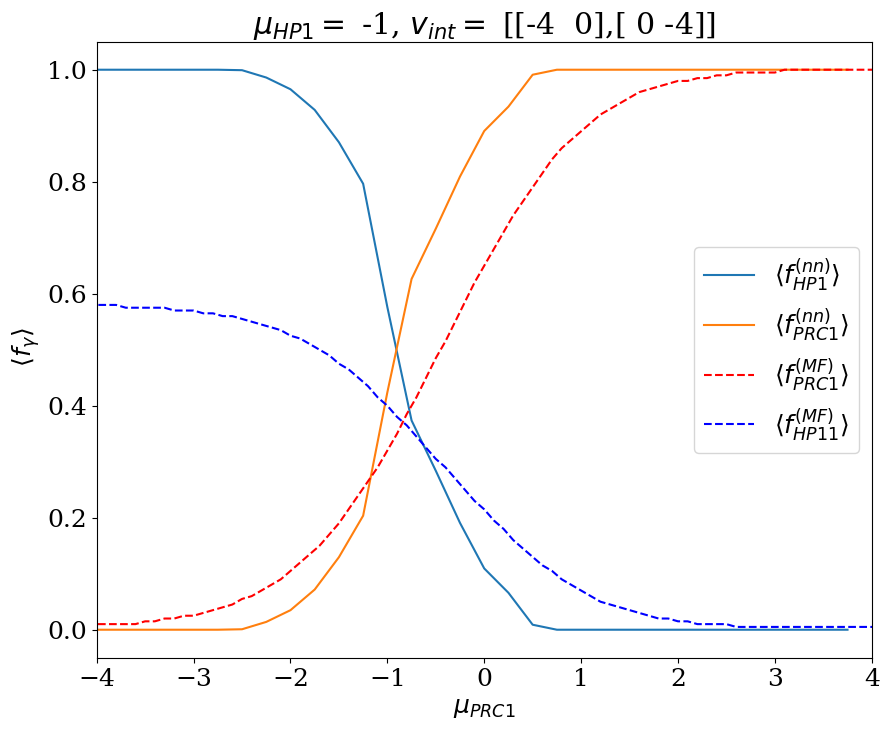

In [82]:
# 1D solution plotting
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

f_gam = density_maps

mu1_val = -1

plt.plot(mu_prc1, hp1_av_arr/2, label = r"$ \langle f_{HP1}^{(nn)} \rangle $")
plt.plot(mu_prc1, prc1_av_arr/2, label = r"$ \langle f_{PRC1}^{(nn)} \rangle $")

plt.plot(mu2_array, f_gam[1][np.where(np.round(mu1_array,2) == mu1_val )[0][0],:] / 2, linestyle = "--", label = r"$ \langle f_{PRC1}^{(MF)} \rangle $", color = "red")
plt.plot(mu1_array, f_gam[0][np.where(np.round(mu1_array,2) == mu1_val )[0][0],:] / 2, linestyle = "--",  label = r"$ \langle f_{HP11}^{(MF)} \rangle $", color = "blue")

plt.xlim(-4,4)

plt.ylabel(r" $ \langle f_{\gamma} \rangle $")
plt.xlabel("$\mu_{PRC1} $")
plt.title(r"$ \mu_{HP1} = $ " + str(np.round(mu1_val, 2)) + r", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")

plt.legend()